<a href="https://colab.research.google.com/github/GabrielRibeiro5402/Analise_Exploratoria_Enem_2023/blob/main/Analise_Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dicionário de Dados**
---
###  `TP_FAIXA_ETARIA`

1. Menor de 17 anos
2. 17 anos
3. 18 anos
4. 19 anos
5. 20 anos
6. 21 anos
7. 22 anos
8. 23 anos
9. 24 anos
10. 25 anos
11. Entre 26 e 30 anos
12. Entre 31 e 35 anos
13. Entre 36 e 40 anos
14. Entre 41 e 45 anos
15. Entre 46 e 50 anos
16. Entre 51 e 55 anos
17. Entre 56 e 60 anos
18. Entre 61 e 65 anos
19. Entre 66 e 70 anos
20. Maior de 70 anos


###  `TP_SEXO`
M. Maculino

F. Feminino


### `TP_COR_RACA`

0. Não declarado
1. Branca
2. Preta
3. Parda
4. Amarela
5. Indígena
6. Não dispõe da informação











In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
dados_cru = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2023.csv', encoding = 'ISO - 8859-1', sep=';')
dados_cru.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_PRESENCA_CN,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025
0,14,M,1,1,1,0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,0,NaN,A,F,F,B
1,12,M,1,1,1,0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,0,NaN,F,E,H,B
2,6,F,1,1,1,0,NaN,NaN,NaN,1,...,502.0,498.9,475.6,363.2,1,700.0,H,E,C,B
3,2,F,3,2,2,0,2304400.0,Fortaleza,CE,1,...,459.0,508.5,507.2,466.7,0,880.0,D,D,C,B
4,3,F,3,2,2,0,2311306.0,Quixadá,CE,1,...,402.5,379.2,446.9,338.3,0,560.0,B,B,B,A


# Limpeza e tratamento dos dados

In [5]:
dados_cru.shape

(1048575, 23)

In [6]:
dados_cru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   TP_FAIXA_ETARIA   1048575 non-null  int64  
 1   TP_SEXO           1048575 non-null  object 
 2   TP_COR_RACA       1048575 non-null  int64  
 3   TP_ST_CONCLUSAO   1048575 non-null  int64  
 4   TP_ESCOLA         1048575 non-null  int64  
 5   IN_TREINEIRO      1048575 non-null  int64  
 6   CO_MUNICIPIO_ESC  268528 non-null   float64
 7   NO_MUNICIPIO_ESC  268528 non-null   object 
 8   SG_UF_ESC         268528 non-null   object 
 9   TP_PRESENCA_CN    1048575 non-null  int64  
 10  TP_PRESENCA_CH    1048575 non-null  int64  
 11  TP_PRESENCA_LC    1048575 non-null  int64  
 12  TP_PRESENCA_MT    1048575 non-null  int64  
 13  NU_NOTA_CN        774770 non-null   float64
 14  NU_NOTA_CH        807228 non-null   float64
 15  NU_NOTA_LC        807228 non-null   float64
 16  

In [7]:
dados_cru.isnull().sum()

TP_FAIXA_ETARIA          0
TP_SEXO                  0
TP_COR_RACA              0
TP_ST_CONCLUSAO          0
TP_ESCOLA                0
IN_TREINEIRO             0
CO_MUNICIPIO_ESC    780047
NO_MUNICIPIO_ESC    780047
SG_UF_ESC           780047
TP_PRESENCA_CN           0
TP_PRESENCA_CH           0
TP_PRESENCA_LC           0
TP_PRESENCA_MT           0
NU_NOTA_CN          273805
NU_NOTA_CH          241347
NU_NOTA_LC          241347
NU_NOTA_MT          273805
TP_LINGUA                0
NU_NOTA_REDACAO     241347
Q001                     0
Q002                     0
Q006                     0
Q025                     0
dtype: int64

In [8]:
dados_cru.dropna(inplace =True)

In [9]:
dados_cru.reset_index(drop=True)

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_PRESENCA_CN,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025
0,2,F,3,2,2,0,2304400.0,Fortaleza,CE,1,...,459.0,508.5,507.2,466.7,0,880.0,D,D,C,B
1,3,F,3,2,2,0,2311306.0,Quixadá,CE,1,...,402.5,379.2,446.9,338.3,0,560.0,B,B,B,A
2,3,M,3,2,2,0,4128005.0,Ubiratã,PR,1,...,608.2,667.6,607.9,691.9,0,780.0,D,E,D,B
3,4,F,1,2,2,0,1501402.0,Belém,PA,1,...,515.7,553.1,544.4,437.0,0,880.0,E,E,B,B
4,3,M,1,2,2,0,3550308.0,São Paulo,SP,1,...,523.8,576.3,596.5,628.1,0,600.0,C,C,D,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224457,3,F,1,2,2,0,3525904.0,Jundiaí,SP,1,...,457.4,477.0,501.7,516.0,1,800.0,D,E,C,B
224458,2,F,3,2,2,0,2112209.0,Timon,MA,1,...,506.8,413.1,483.3,501.0,0,560.0,B,E,B,B
224459,2,F,3,2,2,0,2306900.0,Jaguaribe,CE,1,...,448.3,412.4,472.3,401.4,1,360.0,A,A,B,B
224460,2,F,3,2,2,0,2306553.0,Itarema,CE,1,...,482.1,454.0,493.0,494.0,0,900.0,B,B,B,B


In [10]:
dados_cru.isnull().sum()

TP_FAIXA_ETARIA     0
TP_SEXO             0
TP_COR_RACA         0
TP_ST_CONCLUSAO     0
TP_ESCOLA           0
IN_TREINEIRO        0
CO_MUNICIPIO_ESC    0
NO_MUNICIPIO_ESC    0
SG_UF_ESC           0
TP_PRESENCA_CN      0
TP_PRESENCA_CH      0
TP_PRESENCA_LC      0
TP_PRESENCA_MT      0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_MT          0
TP_LINGUA           0
NU_NOTA_REDACAO     0
Q001                0
Q002                0
Q006                0
Q025                0
dtype: int64

In [11]:
dados_cru.dtypes

TP_FAIXA_ETARIA       int64
TP_SEXO              object
TP_COR_RACA           int64
TP_ST_CONCLUSAO       int64
TP_ESCOLA             int64
IN_TREINEIRO          int64
CO_MUNICIPIO_ESC    float64
NO_MUNICIPIO_ESC     object
SG_UF_ESC            object
TP_PRESENCA_CN        int64
TP_PRESENCA_CH        int64
TP_PRESENCA_LC        int64
TP_PRESENCA_MT        int64
NU_NOTA_CN          float64
NU_NOTA_CH          float64
NU_NOTA_LC          float64
NU_NOTA_MT          float64
TP_LINGUA             int64
NU_NOTA_REDACAO     float64
Q001                 object
Q002                 object
Q006                 object
Q025                 object
dtype: object

In [12]:
dados_cru.TP_FAIXA_ETARIA.value_counts().sort_index()

TP_FAIXA_ETARIA
1       1378
2      88377
3     114072
4      14757
5       3137
6        838
7        328
8        214
9        144
10        84
11       376
12       210
13       197
14       122
15       104
16        66
17        36
18        12
19         8
20         2
Name: count, dtype: int64

# Faixa Etaria

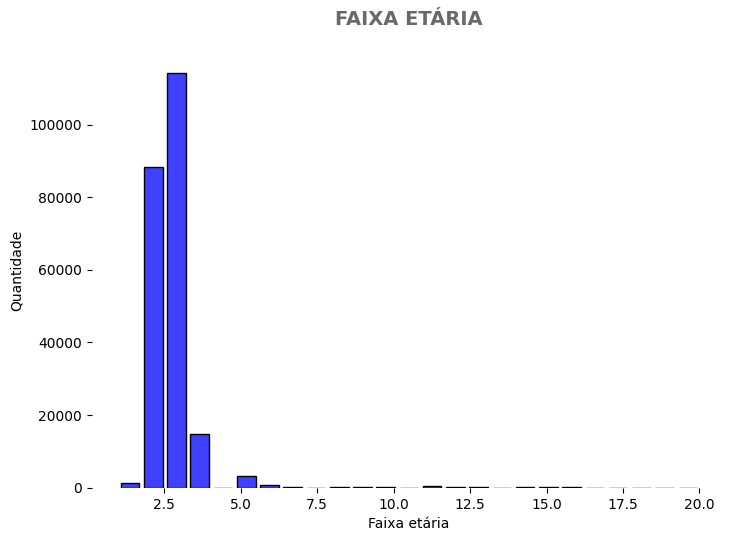

In [87]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.histplot(data=dados_cru, x="TP_FAIXA_ETARIA", color='#0000FF', bins=25, shrink=.8
             )

plt.title('FAIXA ETÁRIA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Faixa etária', fontsize=10, color='black')

plt.ylabel('Quantidade', fontsize=10, color='black')
plt.show()

# Sexo

In [14]:
dados_cru.TP_SEXO.value_counts(normalize=True).sort_index()*100

TP_SEXO
F    62.408336
M    37.591664
Name: proportion, dtype: float64

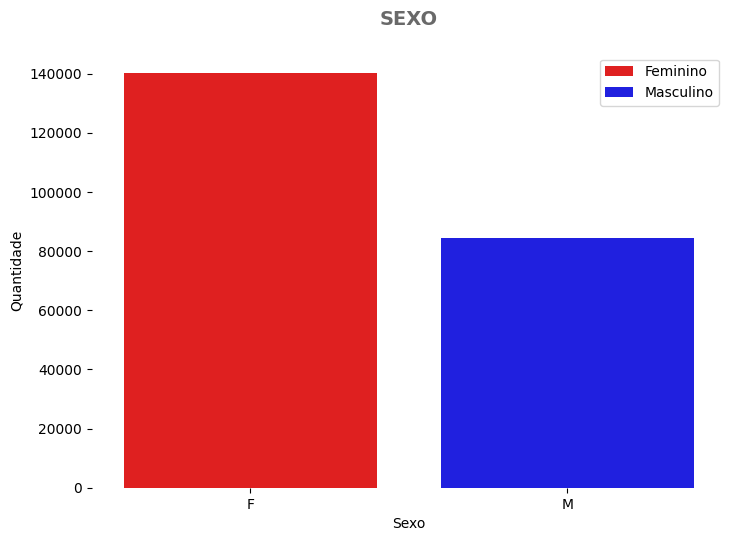

In [90]:
palette = [
    "#FF0000", "#0000FF"
]
plt.figure(figsize=(18, 5.65))
ax2 = plt.subplot(1, 2, 1)

sns.countplot(data=dados_cru, x="TP_SEXO", hue="TP_SEXO", palette=palette)

plt.title('SEXO', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.legend(loc=1, labels=['Feminino', 'Masculino'])

plt.xlabel('Sexo', fontsize=10, color='black')

plt.ylabel('Quantidade', fontsize=10, color='black')
plt.show()

# SEXO X IDADE






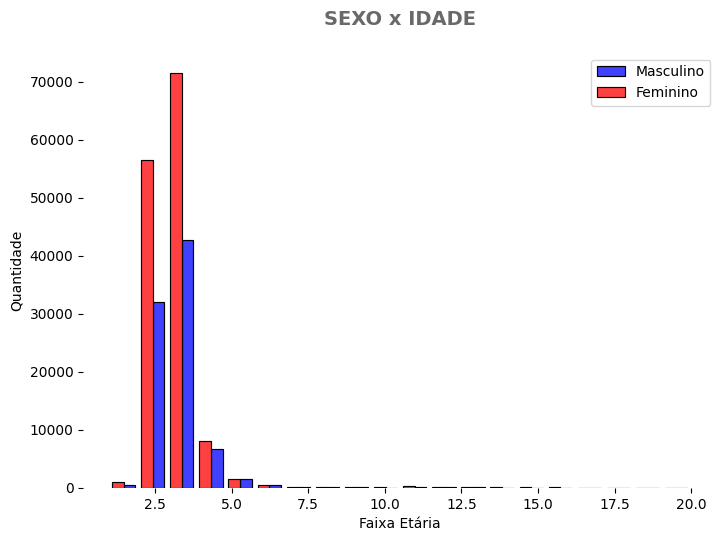

In [91]:
palette = [
    "#FF0000", "#0000FF"
]
plt.figure(figsize=(18, 5.65))
ax2 = plt.subplot(1, 2, 1)

sns.histplot(data=dados_cru, x="TP_FAIXA_ETARIA", hue="TP_SEXO", palette=palette,bins=20, shrink=0.8, multiple="dodge")

plt.title('SEXO x IDADE', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.legend(['Masculino', 'Feminino'], fontsize=10)

plt.xlabel('Faixa Etária', fontsize=10, color='black')

plt.ylabel('Quantidade', fontsize=10, color='black')
plt.show()

# Tipo de Escola

In [17]:
dados_cru.TP_ESCOLA.value_counts(normalize=True).round(4)*100

TP_ESCOLA
2    79.63
3    20.37
1     0.00
Name: proportion, dtype: float64

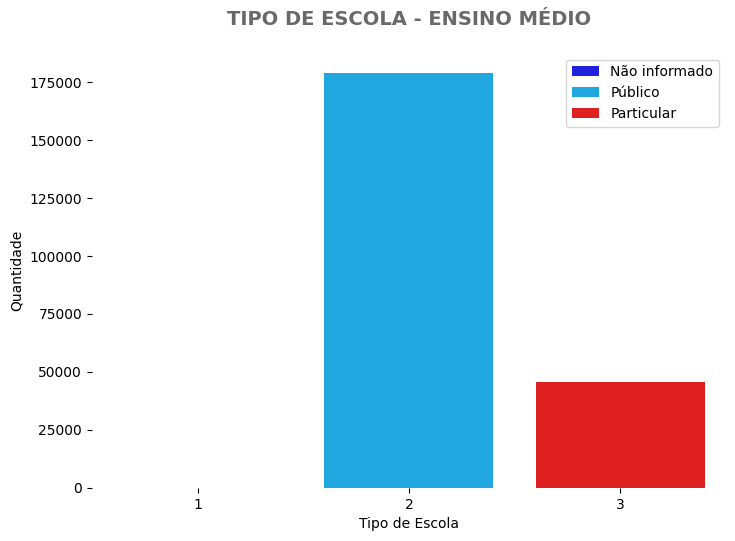

In [92]:
palette = [
    "#0000FF", "#00B4FF", "#FF0000"
]

plt.figure(figsize=(18, 5.65))
ax2 = plt.subplot(1, 2, 1)
sns.countplot(data=dados_cru, x="TP_ESCOLA", hue="TP_ESCOLA", palette=palette, dodge=False)

plt.title('TIPO DE ESCOLA - ENSINO MÉDIO', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.legend(loc=1, labels=['Não informado', 'Público', 'Particular'])

plt.xlabel('Tipo de Escola', fontsize=10, color='black')

plt.ylabel('Quantidade', fontsize=10, color='black')
plt.show()

In [19]:
dados_cru.IN_TREINEIRO.value_counts().sort_index()

IN_TREINEIRO
0    224462
Name: count, dtype: int64

# Estados

In [20]:
Estados = dados_cru.SG_UF_ESC.value_counts().index

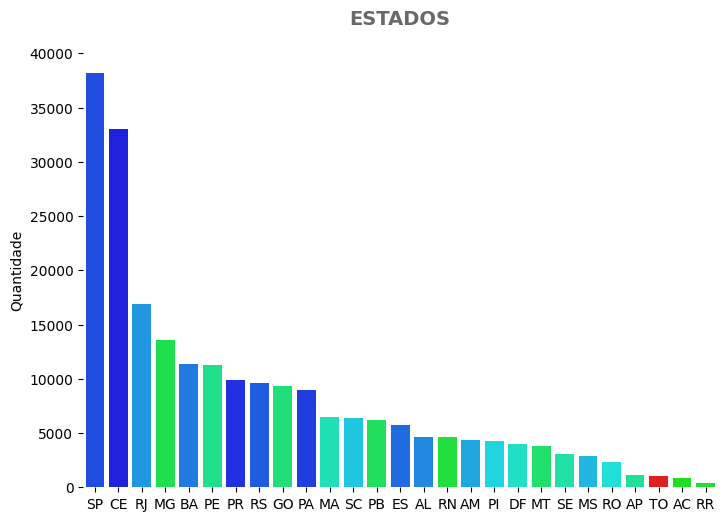

In [86]:
palette = [
    "#0000FF", "#0014FF", "#0028FF", "#003CFF", "#0050FF", "#0064FF", "#0078FF",
    "#008CFF", "#00A0FF", "#00B4FF", "#00C8FF", "#00DCFF", "#00F0FF", "#00FFF0",
    "#00FFDC", "#00FFC8", "#00FFB4", "#00FFA0", "#00FF8C", "#00FF78", "#00FF64",
    "#00FF50", "#00FF3C", "#00FF28", "#00FF14", "#00FF00", "#FF0000"
]

plt.figure(figsize=(18, 5.65))
ax2 = plt.subplot(1, 2, 1)

sns.countplot(data=dados_cru, x="SG_UF_ESC", hue="SG_UF_ESC", palette=palette, dodge=False, order=Estados)

plt.title('ESTADOS', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('', fontsize=10, color='black')

plt.ylabel('Quantidade', fontsize=10, color='black')
plt.show()

In [22]:
dados_cru.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
TP_FAIXA_ETARIA,224462.0,2.77,1.06,1.0,2.0,3.0,3.0,20.0
TP_COR_RACA,224462.0,1.98,1.00,0.0,1.0,2.0,3.0,5.0
TP_ST_CONCLUSAO,224462.0,2.00,0.00,2.0,2.0,2.0,2.0,2.0
TP_ESCOLA,224462.0,2.20,0.40,1.0,2.0,2.0,2.0,3.0
IN_TREINEIRO,224462.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CO_MUNICIPIO_ESC,224462.0,3123972.25,991701.31,1100015.0,2309607.0,3138609.0,3550308.0,5300108.0
TP_PRESENCA_CN,224462.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0
TP_PRESENCA_CH,224462.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0
TP_PRESENCA_LC,224462.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0
TP_PRESENCA_MT,224462.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0


# Raça


In [57]:
rc = dados_cru.TP_COR_RACA.value_counts().index

In [55]:
porcentagem = dados_cru.TP_COR_RACA.value_counts(normalize=True).reindex(rc).fillna(0) * 100


# Adicionar as porcentagens acima das barras
for p in plot.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    # Mapear a categoria correta usando a posição da barra
    category = int(p.get_x() + p.get_width() / 2 + 0.5)
    ax2.text(x,
             height + 1,
             f'{porcentagem[rc[category]]:.2f}%',
             ha='center',
             va='bottom',
             fontsize=12,
             fontweight='bold',
             color='black')

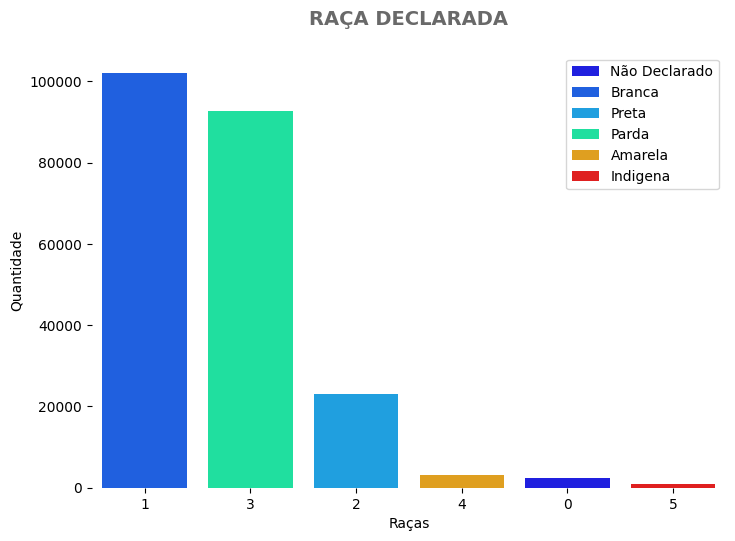

In [85]:
palette = ["#0000FF", "#0055FF", "#00AAFF", "#00FFAA", "#FFAA00", "#FF0000"]

plt.figure(figsize=(18, 5.65))
ax2 = plt.subplot(1, 2, 1)

plot = sns.countplot(data=dados_cru, x="TP_COR_RACA", hue="TP_COR_RACA", palette=palette, dodge=False, order=rc)

plt.title('RAÇA DECLARADA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.legend(loc=1, labels=['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indigena'])

plt.xlabel('Raças', fontsize=10, color='black')

plt.ylabel('Quantidade', fontsize=10, color='black')
plt.show()

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


# NOTAS CN

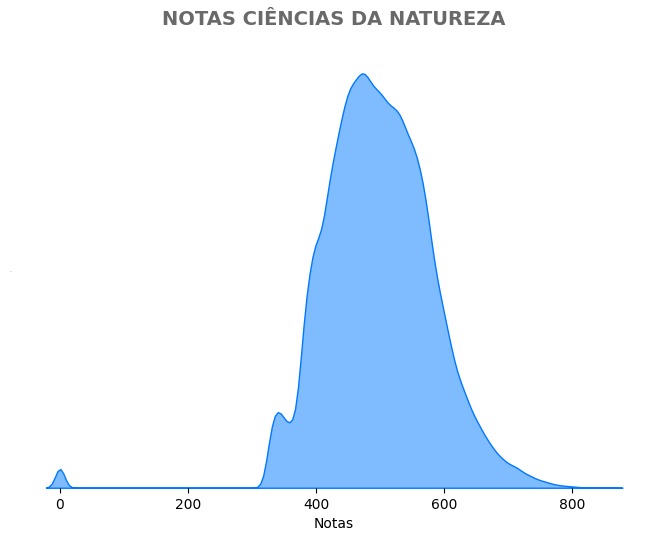

In [96]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NU_NOTA_CN", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS CIÊNCIAS DA NATUREZA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

# NOTAS CH

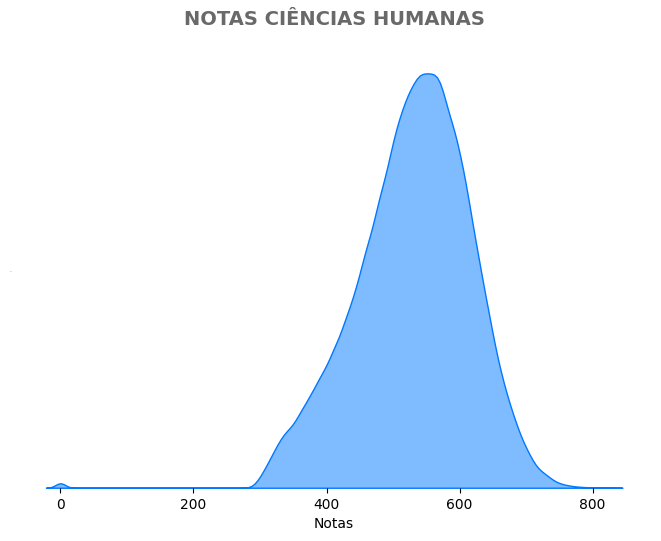

In [97]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NU_NOTA_CH", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS CIÊNCIAS HUMANAS', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

# NOTAS LC

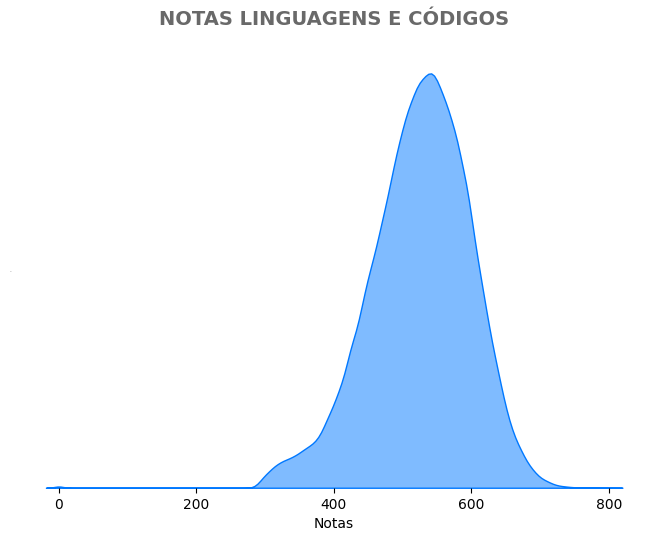

In [99]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NU_NOTA_LC", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS LINGUAGENS E CÓDIGOS', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

# NOTAS MT

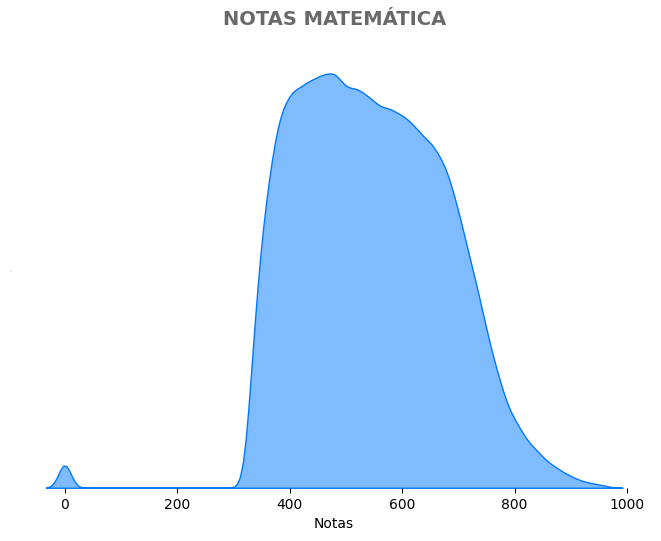

In [100]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NU_NOTA_MT", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS MATEMÁTICA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

# NOTAS REDAÇÃO

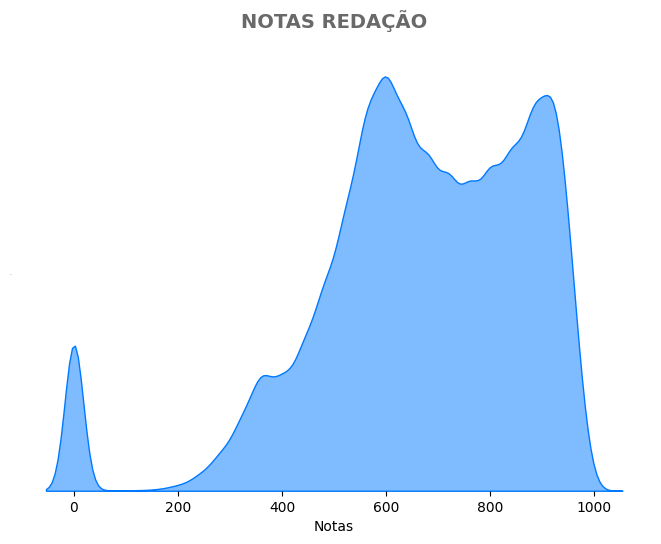

In [101]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NU_NOTA_REDACAO", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS REDAÇÃO', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

In [69]:
nota_total = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO' ]

In [70]:
dados_cru['NOTA_MEDIA'] = dados_cru[nota_total].mean(axis=1)

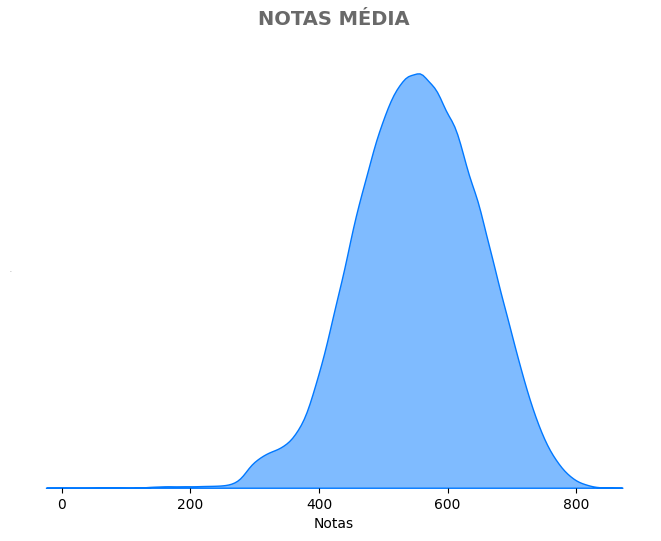

In [102]:

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NOTA_MEDIA", fill=True, color="#0078FF",alpha=.5)

plt.title('NOTAS MÉDIA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

# Analises socioeconomicas

Relaçao renda e nota total

In [ ]:
dados_cru.head()

# NOTA MÉDIA

In [72]:
nota_renda = dados_cru[['NOTA_MEDIA', 'Q006']]

In [73]:
nota_renda['Q006'].value_counts()

Q006
B    68581
C    34955
D    25050
E    17619
G    16448
A    10721
F    10579
H     8913
I     5416
J     4928
Q     3936
K     3904
O     2835
P     2814
N     2803
L     2652
M     2308
Name: count, dtype: int64

<Axes: xlabel='Q006', ylabel='count'>

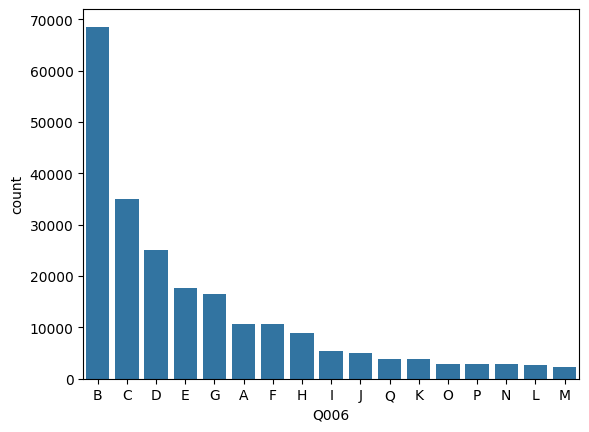

In [74]:
ordem = nota_renda.Q006.value_counts().index
sns.countplot(data=nota_renda, x='Q006', order=ordem, dodge = False)


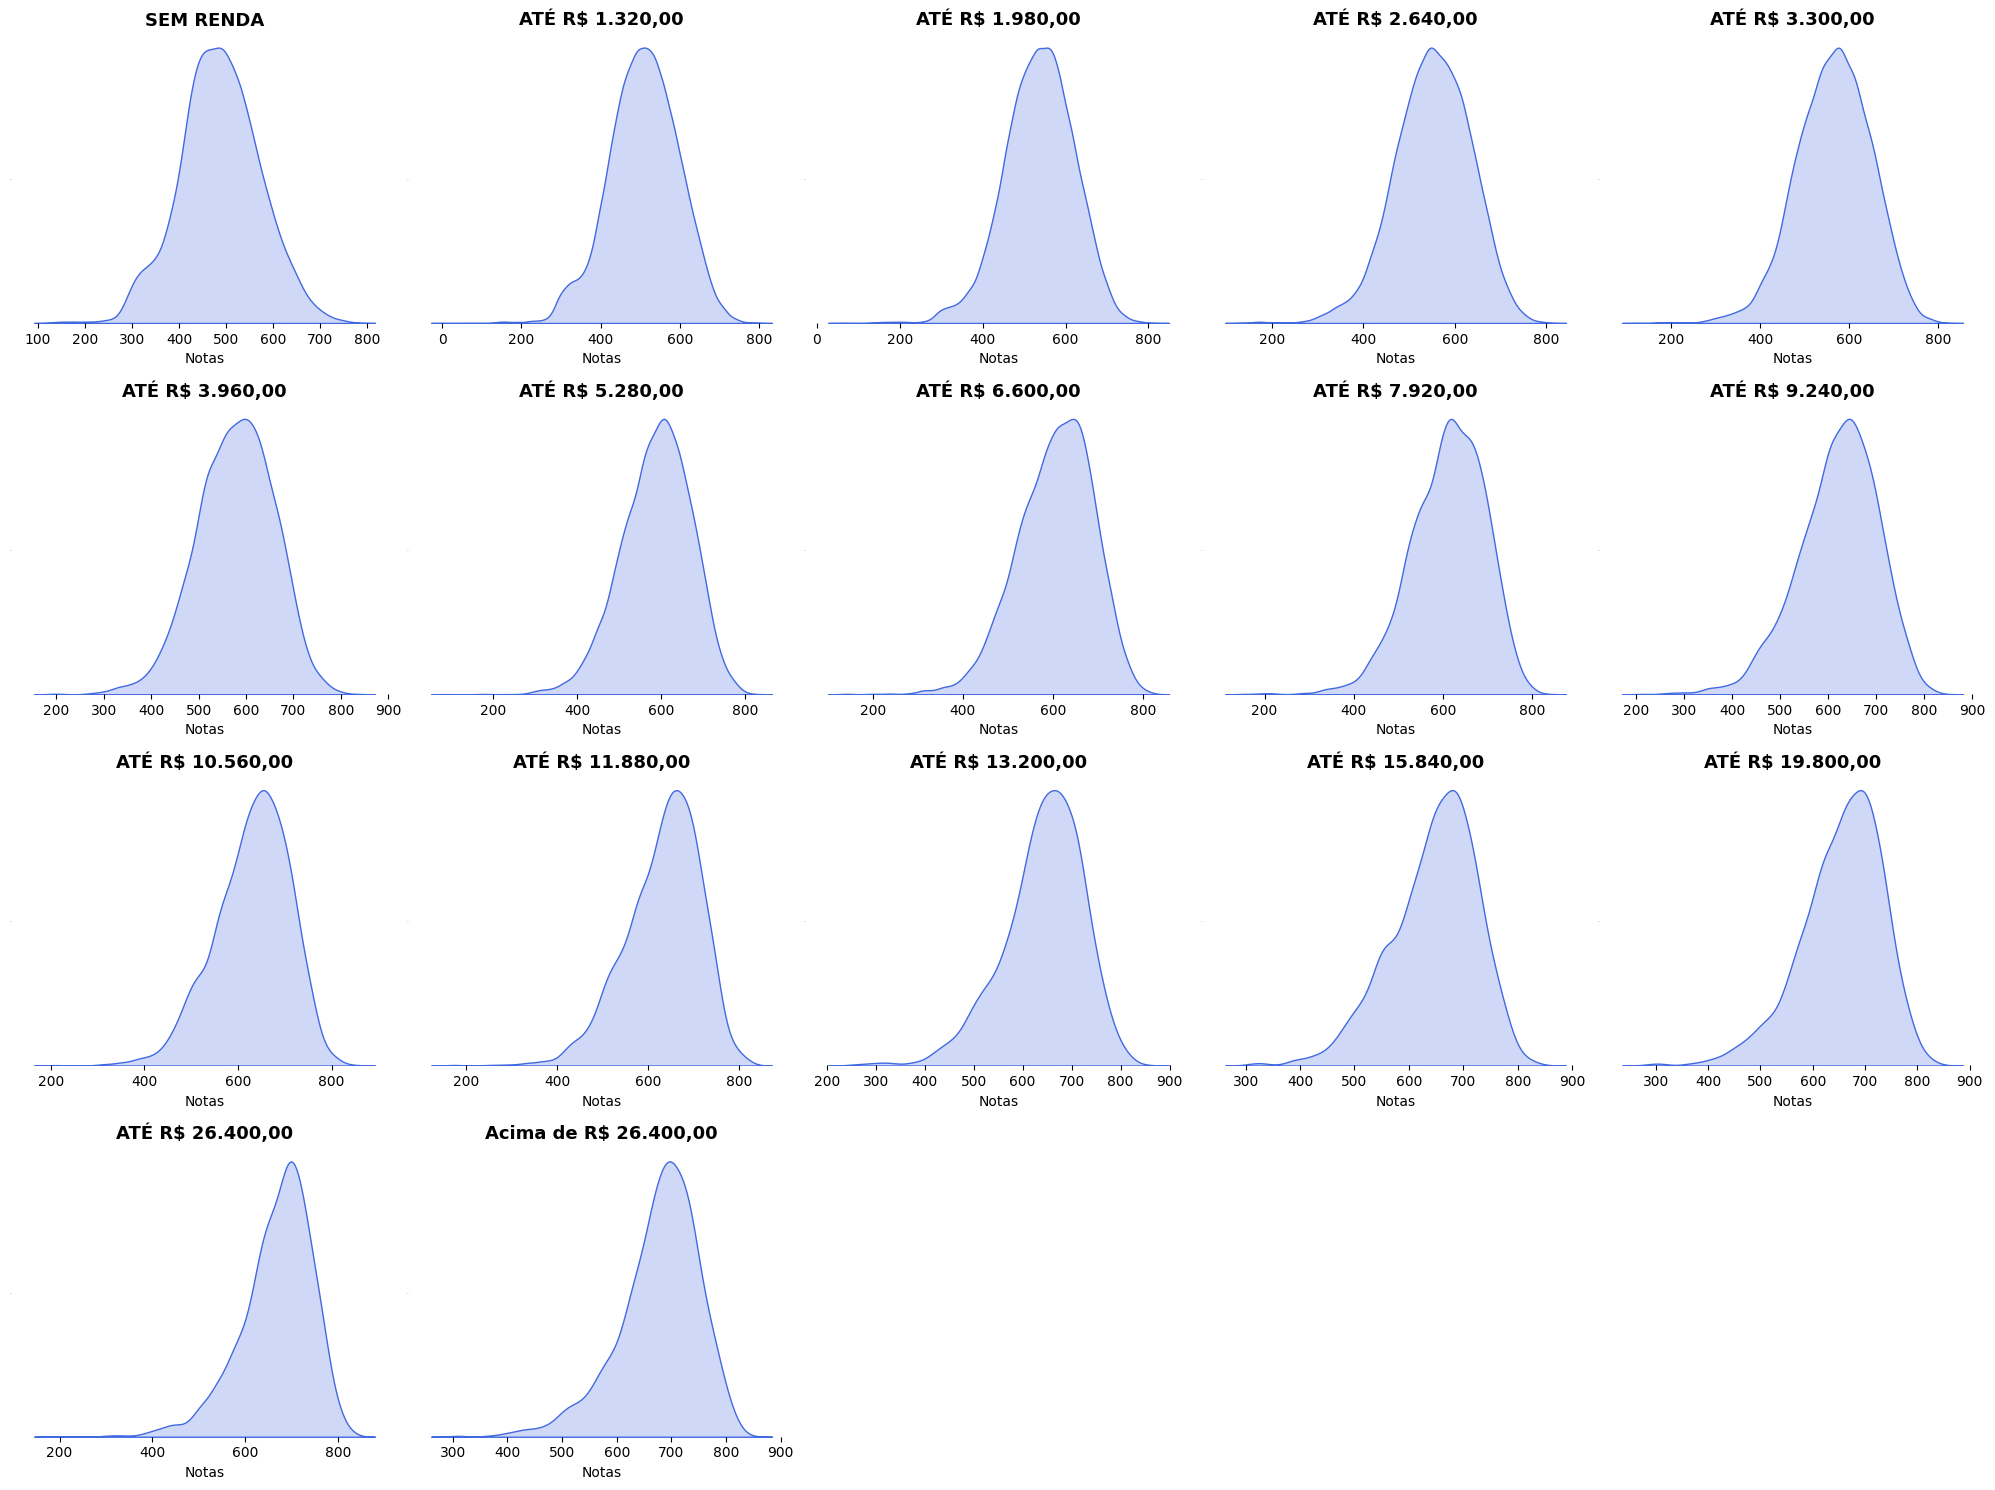

In [75]:

fig, axs = plt.subplots(4, 5, figsize=(20, 15))

categorias = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']

sns.kdeplot(nota_renda[nota_renda['Q006'] == 'A']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 0])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'B']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 1])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'C']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 2])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'D']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 3])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'E']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 4])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'F']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 0])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'G']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 1])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'H']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 2])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'I']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 3])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'J']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 4])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'K']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 0])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'L']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 1])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'M']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 2])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'N']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 3])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'O']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 4])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'P']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[3, 0])
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'Q']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[3, 1])


for ax in axs.flatten():
    ax.set_yticks([])
    ax.set_xlabel('Notas', fontsize=10, color='black')
    ax.set_ylabel([], fontsize=0)

axs[0, 0].set_title('SEM RENDA', fontsize=13, fontweight='bold')
axs[0, 1].set_title('ATÉ R$ 1.320,00', fontsize=13, fontweight='bold')
axs[0, 2].set_title('ATÉ R$ 1.980,00', fontsize=13, fontweight='bold')
axs[0, 3].set_title('ATÉ R$ 2.640,00', fontsize=13, fontweight='bold')
axs[0, 4].set_title('ATÉ R$ 3.300,00', fontsize=13, fontweight='bold')
axs[1, 0].set_title('ATÉ R$ 3.960,00', fontsize=13, fontweight='bold')
axs[1, 1].set_title('ATÉ R$ 5.280,00', fontsize=13, fontweight='bold')
axs[1, 2].set_title('ATÉ R$ 6.600,00', fontsize=13, fontweight='bold')
axs[1, 3].set_title('ATÉ R$ 7.920,00', fontsize=13, fontweight='bold')
axs[1, 4].set_title('ATÉ R$ 9.240,00', fontsize=13, fontweight='bold')
axs[2, 0].set_title('ATÉ R$ 10.560,00', fontsize=13, fontweight='bold')
axs[2, 1].set_title('ATÉ R$ 11.880,00', fontsize=13, fontweight='bold')
axs[2, 2].set_title('ATÉ R$ 13.200,00', fontsize=13, fontweight='bold')
axs[2, 3].set_title('ATÉ R$ 15.840,00', fontsize=13, fontweight='bold')
axs[2, 4].set_title('ATÉ R$ 19.800,00', fontsize=13, fontweight='bold')
axs[3, 0].set_title('ATÉ R$ 26.400,00', fontsize=13, fontweight='bold')
axs[3, 1].set_title('Acima de R$ 26.400,00', fontsize=13, fontweight='bold')

for i in range(len(categorias), len(axs.flat)):
    fig.delaxes(axs.flatten()[i])
sns.despine(bottom =True, left=True)
plt.tight_layout()

plt.show()

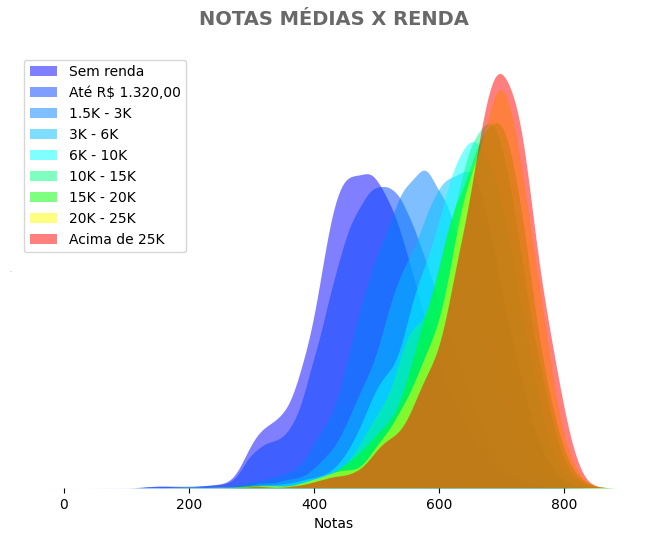

In [83]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(nota_renda[nota_renda['Q006'] == 'A']['NOTA_MEDIA'], label = 'Sem renda', fill =True, alpha=.5, linewidth=0, color='#0000FF')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'B']['NOTA_MEDIA'], label = 'Até R$ 1.320,00', fill =True, alpha=.5, linewidth=0, color='#0040FF')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'E']['NOTA_MEDIA'], label = '1.5K - 3K', fill =True, alpha=.5, linewidth=0, color='#0080FF')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'H']['NOTA_MEDIA'], label = '3K - 6K', fill =True, alpha=.5, linewidth=0, color='#00BFFF')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'K']['NOTA_MEDIA'], label = '6K - 10K', fill =True, alpha=.5, linewidth=0, color='#00FFFF')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'N']['NOTA_MEDIA'], label = '10K - 15K', fill =True, alpha=.5, linewidth=0, color='#00FF80')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'O']['NOTA_MEDIA'], label = '15K - 20K', fill =True, alpha=.5, linewidth=0, color='#00FF00')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'P']['NOTA_MEDIA'], label = '20K - 25K', fill =True, alpha=.5, linewidth=0, color='#FFFF00')
sns.kdeplot(nota_renda[nota_renda['Q006'] == 'Q']['NOTA_MEDIA'], label = 'Acima de 25K', fill =True, alpha=.5, linewidth=0, color='#FF0000')

plt.title('NOTAS MÉDIAS X RENDA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

ax = plt.legend(loc='upper left')

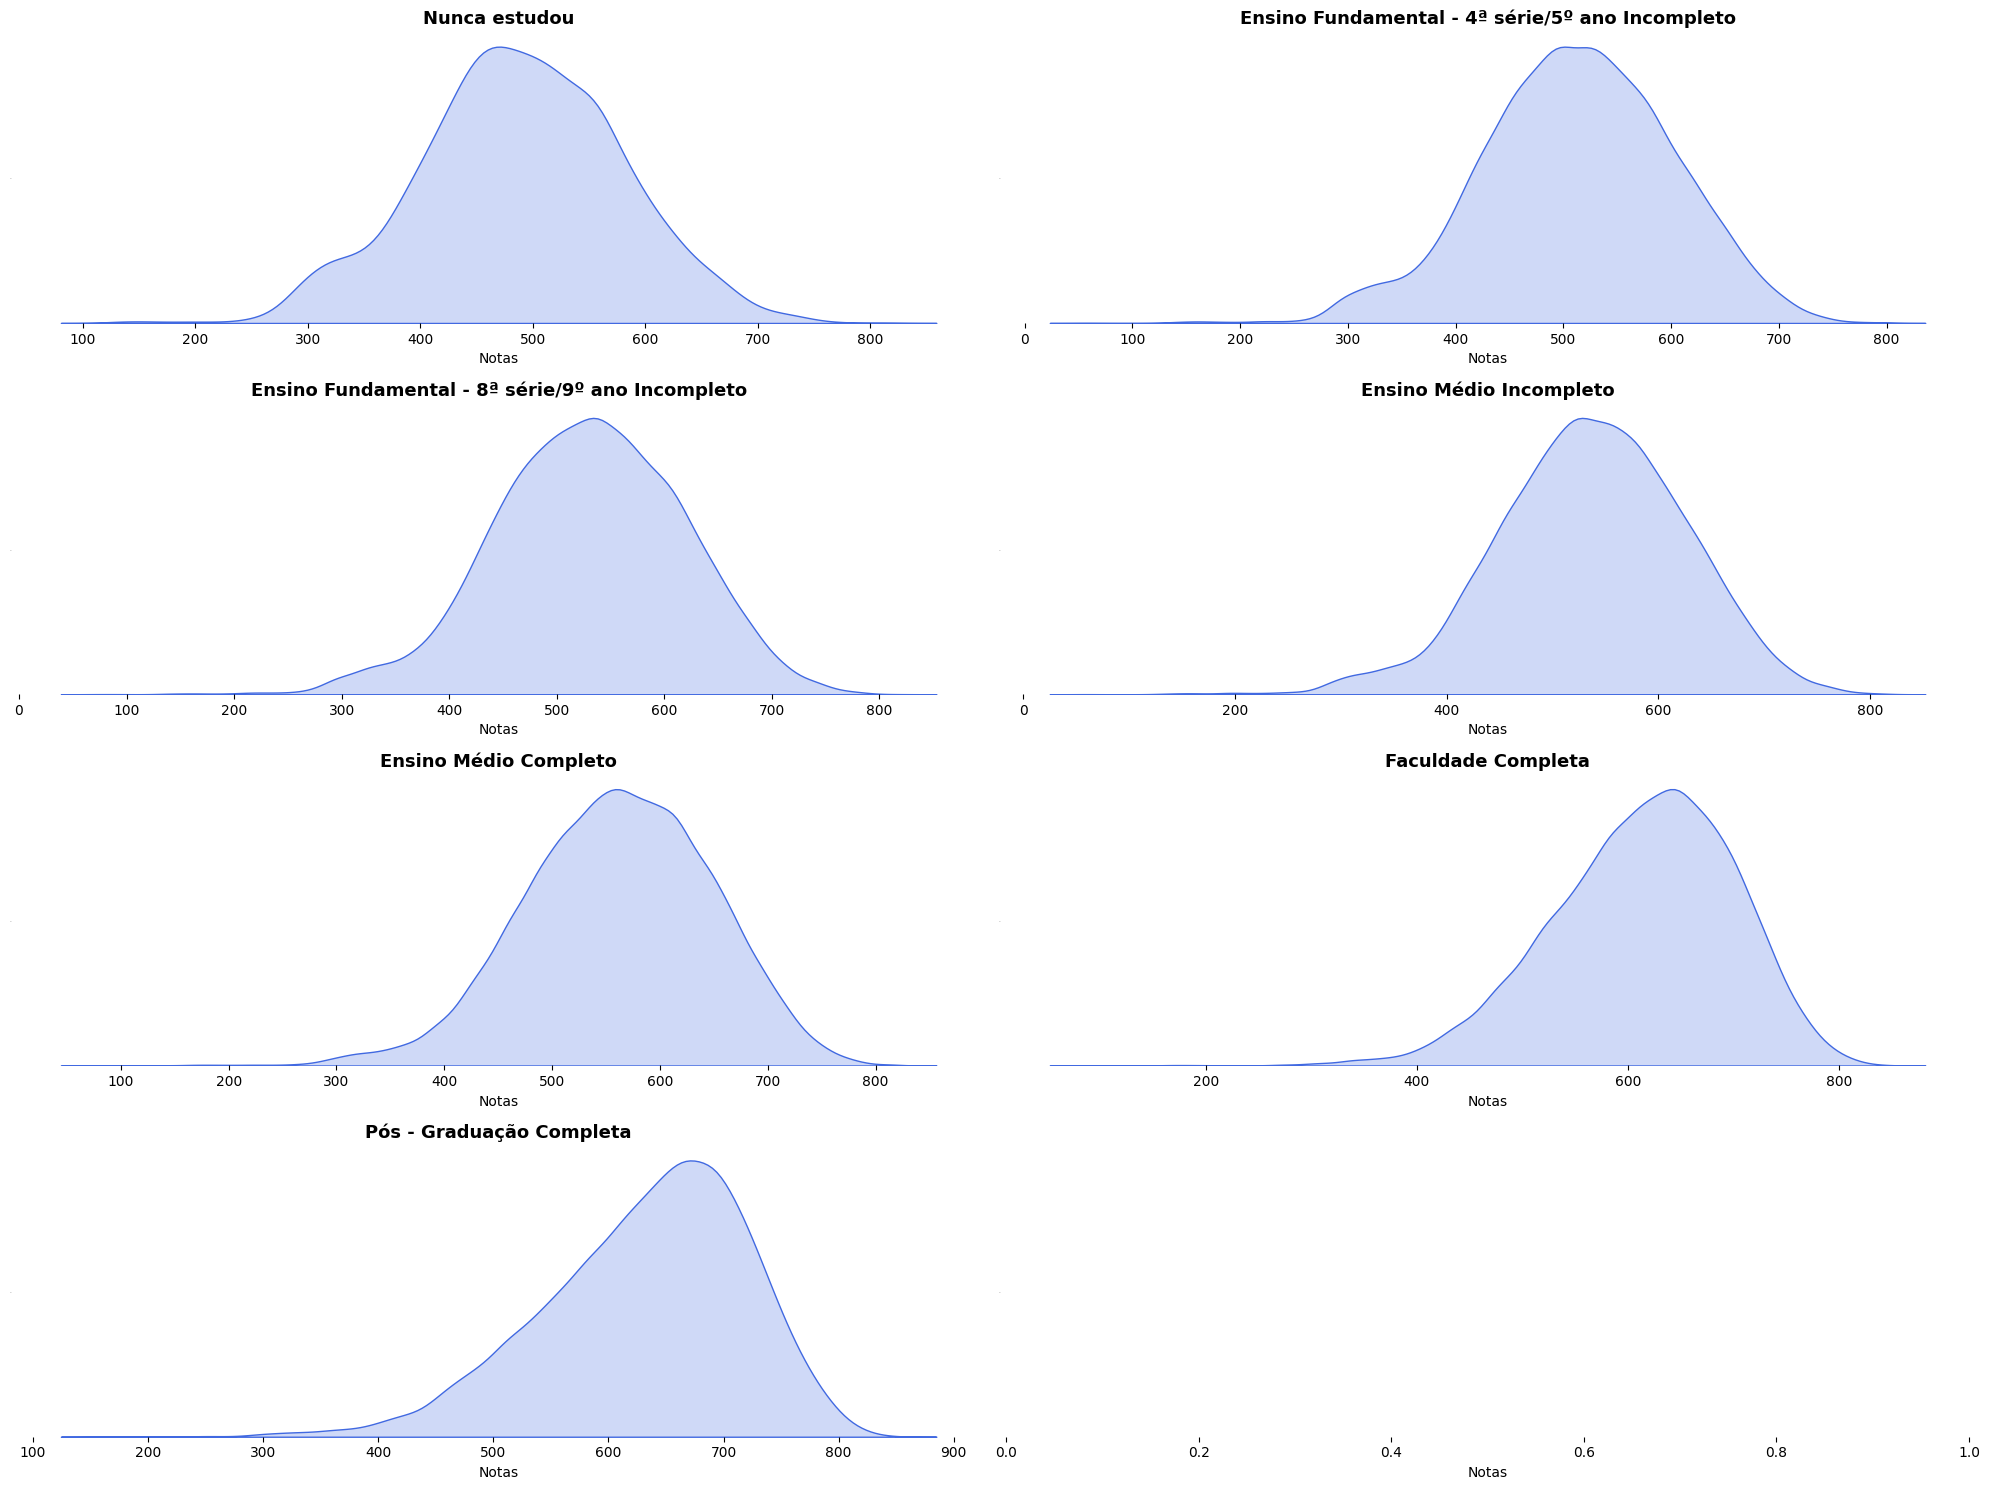

In [103]:
fig, axs = plt.subplots(4, 2, figsize=(20, 15))


sns.kdeplot(dados_cru[dados_cru['Q001'] == 'A']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 0])
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'B']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[0, 1])
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'C']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 0])
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'D']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[1, 1])
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'E']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 0])
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'F']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[2, 1])
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'G']['NOTA_MEDIA'], fill=True, color='#4169E1', ax=axs[3, 0])

for ax in axs.flatten():
    ax.set_yticks([])
    ax.set_xlabel('Notas', fontsize=10, color='black')
    ax.set_ylabel([], fontsize=0)

axs[0, 0].set_title('Nunca estudou', fontsize=13, fontweight='bold')
axs[0, 1].set_title('Ensino Fundamental - 4ª série/5º ano Incompleto', fontsize=13, fontweight='bold')
axs[1, 0].set_title('Ensino Fundamental - 8ª série/9º ano Incompleto', fontsize=13, fontweight='bold')
axs[1, 1].set_title('Ensino Médio Incompleto', fontsize=13, fontweight='bold')
axs[2, 0].set_title('Ensino Médio Completo', fontsize=13, fontweight='bold')
axs[2, 1].set_title('Faculdade Completa', fontsize=13, fontweight='bold')
axs[3, 0].set_title('Pós - Graduação Completa', fontsize=13, fontweight='bold')

sns.despine(bottom =True, left=True)
plt.tight_layout()

plt.show()

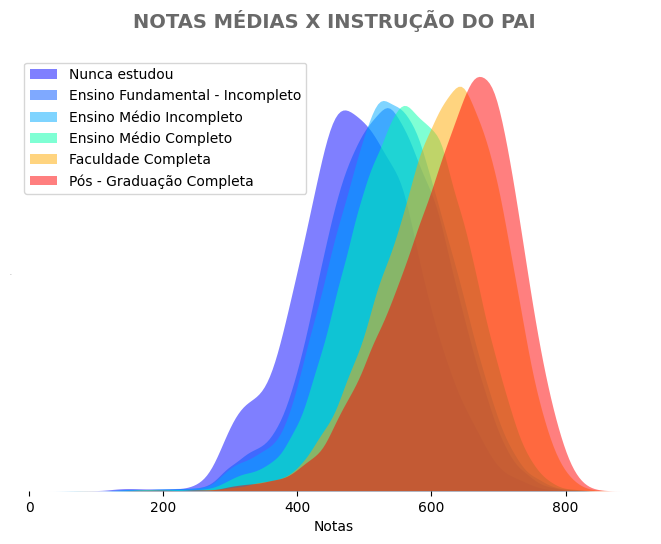

In [84]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)



sns.kdeplot(dados_cru[dados_cru['Q001'] == 'A']['NOTA_MEDIA'], fill=True, label ='Nunca estudou', color='#0000FF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'C']['NOTA_MEDIA'], fill=True, label = 'Ensino Fundamental - Incompleto', color='#0055FF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'D']['NOTA_MEDIA'], fill=True, label ='Ensino Médio Incompleto', color='#00AAFF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'E']['NOTA_MEDIA'], fill=True, label = 'Ensino Médio Completo', color='#00FFAA', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'F']['NOTA_MEDIA'], fill=True, label ='Faculdade Completa', color='#FFAA00', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q001'] == 'G']['NOTA_MEDIA'], fill=True, label = 'Pós - Graduação Completa', color='#FF0000', alpha=.5, linewidth=0)

plt.title('NOTAS MÉDIAS X INSTRUÇÃO DO PAI', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

ax = plt.legend(loc='upper left')

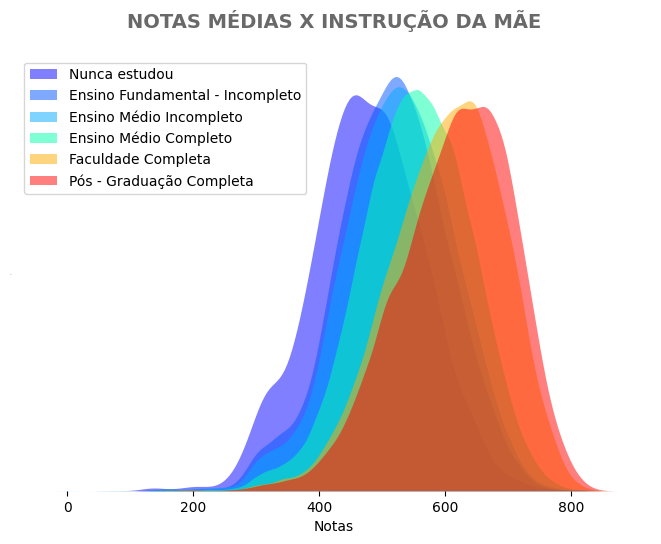

In [106]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(dados_cru[dados_cru['Q002'] == 'A']['NOTA_MEDIA'], fill=True, label ='Nunca estudou', color='#0000FF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q002'] == 'C']['NOTA_MEDIA'], fill=True, label = 'Ensino Fundamental - Incompleto', color='#0055FF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q002'] == 'D']['NOTA_MEDIA'], fill=True, label ='Ensino Médio Incompleto', color='#00AAFF', alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q002'] == 'E']['NOTA_MEDIA'], fill=True, label = 'Ensino Médio Completo', color='#00FFAA', alpha=.5, linewidth=0 )
sns.kdeplot(dados_cru[dados_cru['Q002'] == 'F']['NOTA_MEDIA'], fill=True, label ='Faculdade Completa', color='#FFAA00',  alpha=.5, linewidth=0)
sns.kdeplot(dados_cru[dados_cru['Q002'] == 'G']['NOTA_MEDIA'], fill=True, label = 'Pós - Graduação Completa', color='#FF0000',  alpha=.5, linewidth=0)

plt.title('NOTAS MÉDIAS X INSTRUÇÃO DA MÃE', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)

ax = plt.legend(loc='upper left')

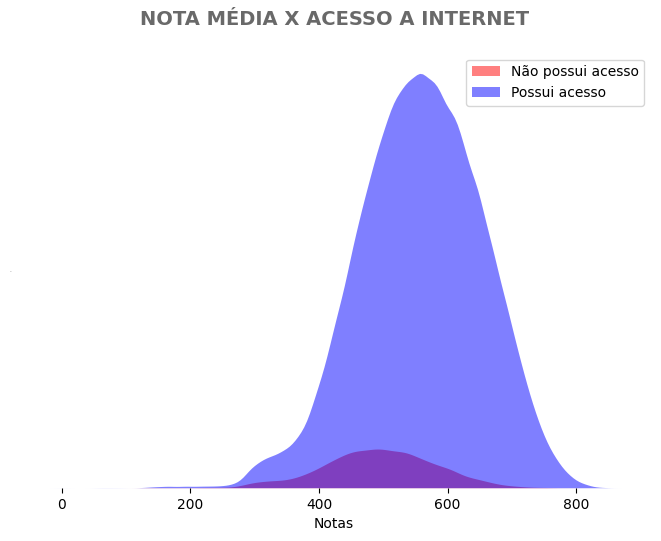

In [111]:
palette = [
    "#0000FF", "#FF0000"
]

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NOTA_MEDIA", hue="Q025", fill=True, palette=palette,alpha=.5, linewidth=0)

plt.legend(['Não possui acesso', 'Possui acesso'], fontsize=10)

plt.title('NOTA MÉDIA X ACESSO A INTERNET', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

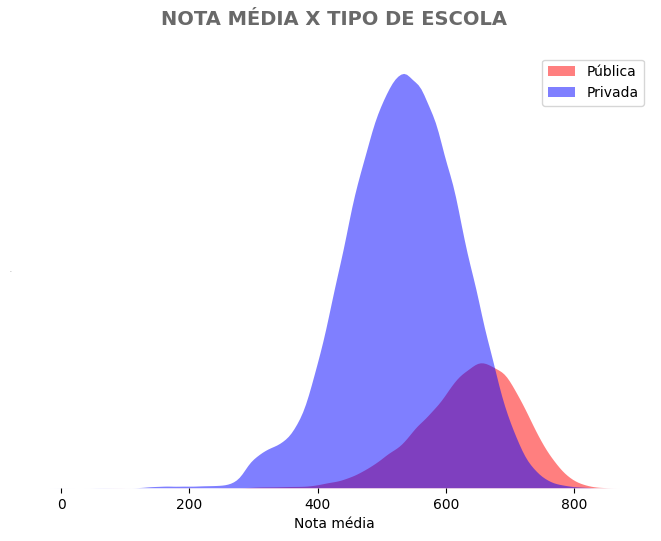

In [112]:
palette = [
    "#0000FF", "#FF0000"
]

dados_filtrados = dados_cru[~dados_cru['TP_ESCOLA'].isin([1])]

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_filtrados, x="NOTA_MEDIA", hue="TP_ESCOLA", fill=True, palette=palette,
   alpha=.5, linewidth=0)

plt.legend(['Pública', 'Privada'], fontsize=10)

plt.title('NOTA MÉDIA X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Nota média', fontsize=10, color='black')

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

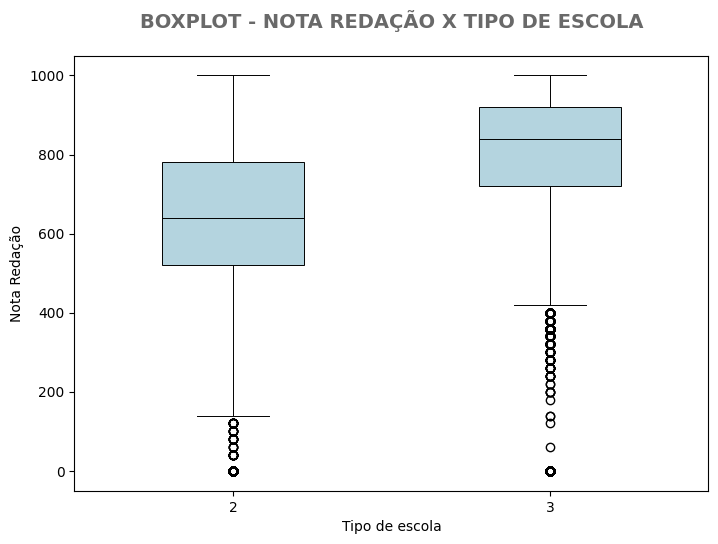

In [113]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


sns.boxplot(data = dados_filtrados, x = 'TP_ESCOLA', y ='NU_NOTA_REDACAO', color='lightblue', linecolor="black", linewidth=.70, gap=.1, width=.5)

plt.title('BOXPLOT - NOTA REDAÇÃO X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Nota Redação', fontsize=10, color='black');

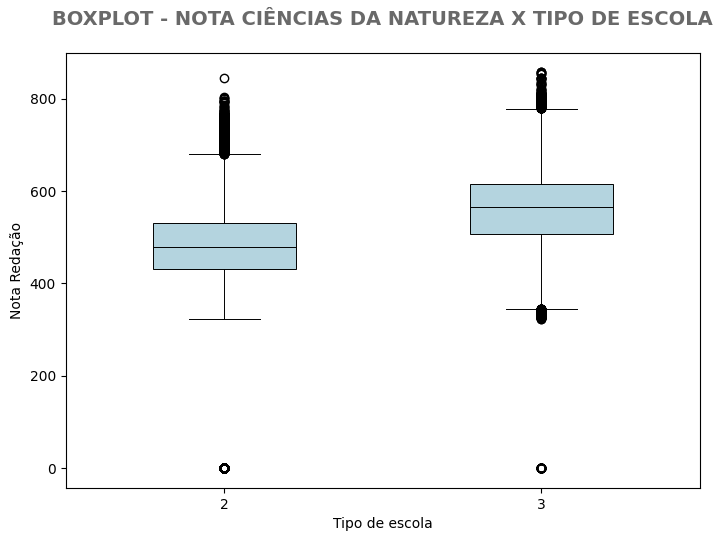

In [114]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


sns.boxplot(data = dados_filtrados, x = 'TP_ESCOLA', y ='NU_NOTA_CN', color='lightblue', linecolor="black", linewidth=.70, gap=.1, width=.5)

plt.title('BOXPLOT - NOTA CIÊNCIAS DA NATUREZA X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Nota Redação', fontsize=10, color='black');

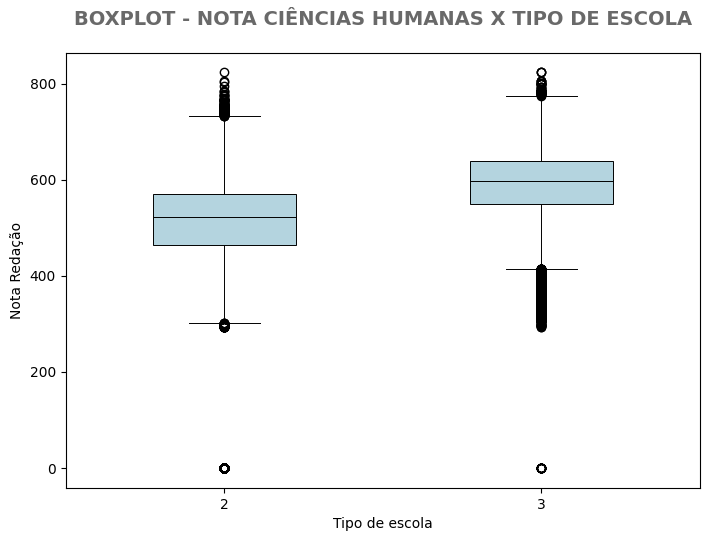

In [115]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


sns.boxplot(data = dados_filtrados, x = 'TP_ESCOLA', y ='NU_NOTA_CH', color='lightblue', linecolor="black", linewidth=.70, gap=.1, width=.5)

plt.title('BOXPLOT - NOTA CIÊNCIAS HUMANAS X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Nota Redação', fontsize=10, color='black');

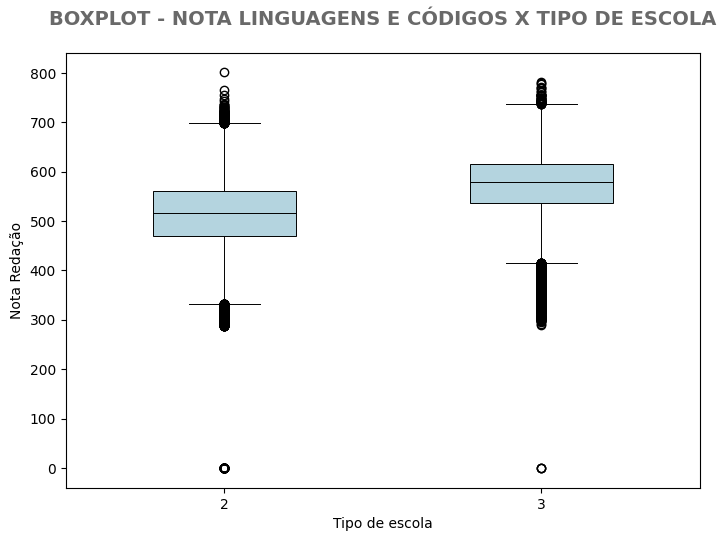

In [116]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


sns.boxplot(data = dados_filtrados, x = 'TP_ESCOLA', y ='NU_NOTA_LC', color='lightblue', linecolor="black", linewidth=.70, gap=.1, width=.5)

plt.title('BOXPLOT - NOTA LINGUAGENS E CÓDIGOS X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Nota Redação', fontsize=10, color='black');

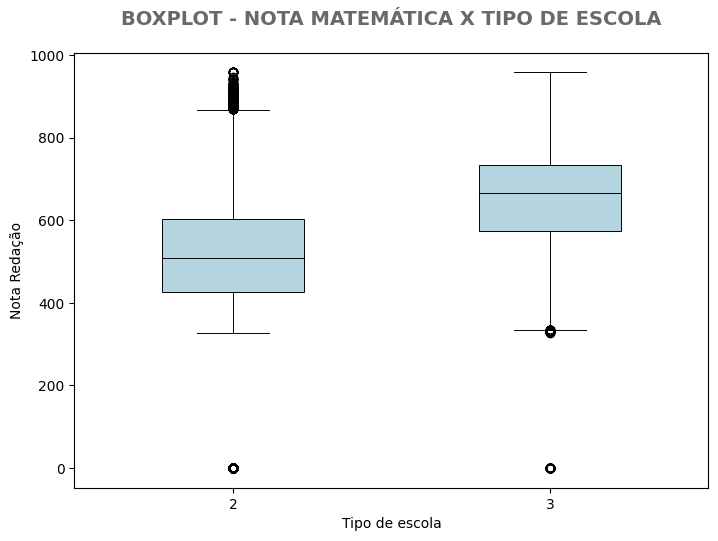

In [117]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


sns.boxplot(data = dados_filtrados, x = 'TP_ESCOLA', y ='NU_NOTA_MT', color='lightblue', linecolor="black", linewidth=.70, gap=.1, width=.5)

plt.title('BOXPLOT - NOTA MATEMÁTICA X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Nota Redação', fontsize=10, color='black');

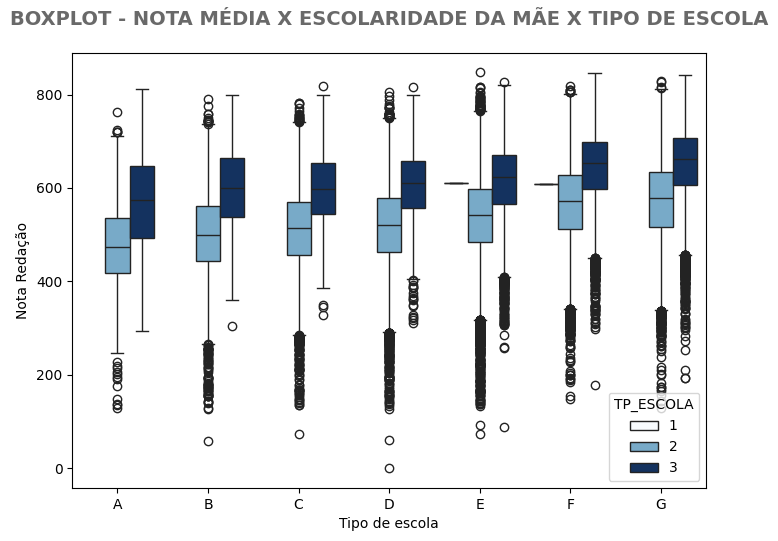

In [118]:
dados_filtrados = dados_cru[~dados_cru['Q002'].isin(['H'])]
renda_ordenada = dados_filtrados.Q002.unique()
renda_ordenada.sort()

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


sns.boxplot(data = dados_filtrados, x = 'Q002', y ='NOTA_MEDIA', hue = 'TP_ESCOLA', order = renda_ordenada, palette='Blues' )

plt.title('BOXPLOT - NOTA MÉDIA X ESCOLARIDADE DA MÃE X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Nota Redação', fontsize=10, color='black');

In [ ]:
dados_filtrados = dados_cru[~dados_cru['Q001'].isin(['H'])]
renda_ordenada = dados_filtrados.Q001.unique()
renda_ordenada.sort()

plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)


sns.boxplot(data = dados_filtrados, x = 'Q001', y ='NOTA_MEDIA', hue = 'TP_ESCOLA', order = renda_ordenada, palette='Blues' )

plt.title('BOXPLOT - NOTA MÉDIA X ESCOLARIDADE DO PAI X TIPO DE ESCOLA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
plt.xlabel('Tipo de escola', fontsize=10, color='black')
plt.ylabel('Nota Redação', fontsize=10, color='black');

In [ ]:
plt.figure(figsize =(18,5.65))
ax2= plt.subplot(1,2,1)

sns.kdeplot(data=dados_cru, x="NOTA_MEDIA", hue="TP_COR_RACA", fill=True, palette='Paired',alpha=.6, linewidth=0)

plt.title('NOTA MÉDIA X RAÇA', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')
sns.despine(bottom =True, left=True)

plt.xlabel('Notas', fontsize=10, color='black')

plt.legend(loc=1, labels=['Não informado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indigena'])

ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

# ANALISES DEMOGRÁFICAS

In [ ]:
!pip install geobr

In [ ]:
import geopandas as gpd
import geobr

In [ ]:
geobr.list_geobr()

In [ ]:
estados = geobr.read_state(code_state='all', year=2020)

In [ ]:
estados

In [ ]:
NOTA_UF = dados_cru[['NOTA_MEDIA', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()
NOTA_UF

In [ ]:
estados.rename({'abbrev_state': 'SG_UF_ESC'}, axis = 1, inplace = True)
estados

In [ ]:
BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NOTA_MEDIA', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

BRASIL

In [ ]:


ax2 = BRASIL.plot(column='NOTA_MEDIA',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA MÉDIA X ESTADOS', pad = 20, fontsize=14, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

In [ ]:
NOTA_UF = dados_cru[['NU_NOTA_CN', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()
NOTA_UF



In [ ]:
BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NU_NOTA_CN', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

BRASIL

In [ ]:
ax2 = BRASIL.plot(column='NU_NOTA_CN',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA CIÊNCIAS DA NATUREZA X ESTADOS', pad = 20, fontsize=16, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

In [ ]:
NOTA_UF = dados_cru[['NU_NOTA_CH', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()

BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NU_NOTA_CH', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

ax2 = BRASIL.plot(column='NU_NOTA_CH',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA CIÊNCIAS HUMANAS X ESTADOS', pad = 20, fontsize=16, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

In [ ]:
NOTA_UF = dados_cru[['NU_NOTA_LC', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()

BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NU_NOTA_LC', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

ax2 = BRASIL.plot(column='NU_NOTA_LC',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA LINGUAGENS E CÓDIGOS X ESTADOS', pad = 20, fontsize=16, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

In [ ]:
NOTA_UF = dados_cru[['NU_NOTA_MT', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()

BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NU_NOTA_MT', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

ax2 = BRASIL.plot(column='NU_NOTA_MT',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA MATEMÁTICA X ESTADOS', pad = 20, fontsize=16, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()

In [ ]:
NOTA_UF = dados_cru[['NU_NOTA_REDACAO', 'SG_UF_ESC']].copy()
NOTA_UF = NOTA_UF.groupby('SG_UF_ESC').mean()

BRASIL = estados.merge(NOTA_UF, on ='SG_UF_ESC', how = 'left')

colunas_para_manter = ['SG_UF_ESC', 'NU_NOTA_REDACAO', 'geometry']
BRASIL = BRASIL[colunas_para_manter]

ax2 = BRASIL.plot(column='NU_NOTA_REDACAO',
            cmap='Blues',
            figsize=(16,8),
            legend=True,
            edgecolor = 'black')

plt.title('NOTA REDAÇÃO X ESTADOS', pad = 20, fontsize=16, color='dimgrey', fontweight = 'bold')

ax2.tick_params(axis = 'x', labelsize = 0, length = 0)
ax2.set_xticks([])
plt.xlabel([], fontsize=0)
ax2.tick_params(axis = 'y', labelsize = 0, length = 0)
ax2.set_yticks([])
plt.ylabel([], fontsize=0)
plt.show()